![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Open DataFrame highlighting production budget and worldwide gross revenue
b_and_p = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
# Convert string columns to integers and date-time columns
# Strip dollar signs and commas from integers
b_and_p['worldwide_gross'] = b_and_p['worldwide_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['production_budget'] = b_and_p['production_budget'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['domestic_gross'] = b_and_p['domestic_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['release_date'] = pd.to_datetime(b_and_p['release_date'])
b_and_p.dropna(subset=['production_budget', 'worldwide_gross'])
b_and_p.at[5189, 'movie'] = "God's Not Dead"
b_and_p.at[2996, 'movie'] = "The King's Speech"

In [4]:
# Filter by movies that grossed at least $1M worldwide and were made in the last 20 years
# Create a gross profit margin column and sort by it
b_and_p = b_and_p[b_and_p['worldwide_gross'] >= 1000000]
b_and_p = b_and_p[b_and_p['release_date'].dt.year >= 1999]
b_and_p['profit_margin_percent'] = (b_and_p['worldwide_gross'] - b_and_p['production_budget']) / b_and_p['worldwide_gross'] * 100
b_and_p['gross_margin_percent'] = b_and_p['worldwide_gross'] / b_and_p['production_budget'] * 100
b_and_p = b_and_p.sort_values(by=['gross_margin_percent'], ascending=False).reset_index(drop=True)

In [5]:
# Create a Top 50 list and hardcode genre for each movie
pd.options.mode.chained_assignment = None
top_50 = b_and_p.iloc[:50]
top_50['genre'] = ['Horror', 'Horror', 'Horror', 'Documentary', 'Musical', 'Comedy', 'Thriller',
                    'Christian', 'Horror', 'Documentary', 'Horror', 'Comedy', 'Christian',
                    'Horror', 'Horror', 'Horror', 'Thriller', 'Christian', 'Documentary', 'Horror',
                    'Romance', 'Foreign', 'Drama', 'Horror', 'Horror', 'Foreign', 'Horror',
                    'Documentary', 'Horror', 'Documentary', 'Comedy', 'Horror', 'Foreign', 'Horror',
                    'Foreign', 'Horror', 'Horror', 'Drama', 'Horror', 'Drama', 'Horror', 'Drama',
                    'Drama', 'Horror', 'Horror', 'Horror', 'Documentary', 'Comedy', 'Drama',
                    'Horror']
top_50

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,gross_margin_percent,genre
0,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,99.768260,43151.785333,Horror
1,80,2015-07-10,The Gallows,100000,22764410,41656474,99.759941,41656.474000,Horror
2,7,1999-07-14,The Blair Witch Project,600000,140539099,248300000,99.758357,41383.333333,Horror
3,10,2004-05-07,Super Size Me,65000,11529368,22233808,99.707652,34205.858462,Documentary
4,57,2007-05-16,Once,150000,9445857,23323631,99.356875,15549.087333,Musical
5,8,2004-06-11,Napoleon Dynamite,400000,44540956,46122713,99.132748,11530.678250,Comedy
6,31,2004-08-06,Open Water,500000,30500882,55518641,99.099402,11103.728200,Thriller
7,81,2006-09-29,Facing the Giants,100000,10178331,10243159,99.023739,10243.159000,Christian
8,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,99.017291,10175.949000,Horror
9,60,2009-04-23,Home,500000,15433,44793168,98.883758,8958.633600,Documentary


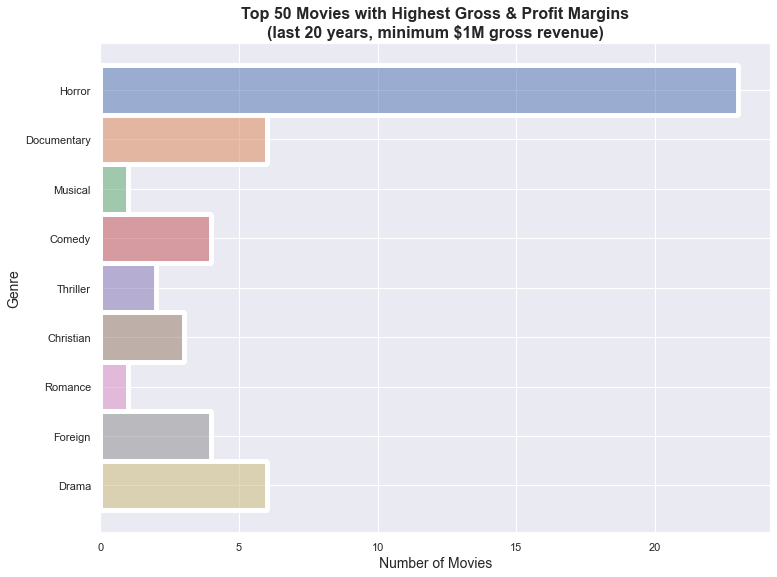

In [12]:
# Plot histogram highlighting Top 50 movies w/ highest GM by genre
genre_hist = sns.histplot(data=top_50, y='genre', hue="genre", legend=False)
sns.set(rc={'figure.figsize':(12,9)})
plt.xlabel('Number of Movies', size=14)
plt.ylabel('Genre', size=14)
plt.title('Top 50 Movies with Highest Gross & Profit Margins\n(last 20 years, minimum $1M gross revenue)',
         size=16, weight=900);

In [13]:
genre_data = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
gross_genre_merge = b_and_p.merge(genre_data, left_on=['movie'], right_on=['primary_title'])
gross_genre_merge['genres'] = gross_genre_merge['genres'].str.replace(',', '')
gross_genre_merge = gross_genre_merge[gross_genre_merge['genres'].str.contains("orro")==True]
gross_genre_merge = gross_genre_merge.drop_duplicates(subset=['movie'])
budget_avg = gross_genre_merge['production_budget'].mean()
revenue_avg = gross_genre_merge['worldwide_gross'].mean()

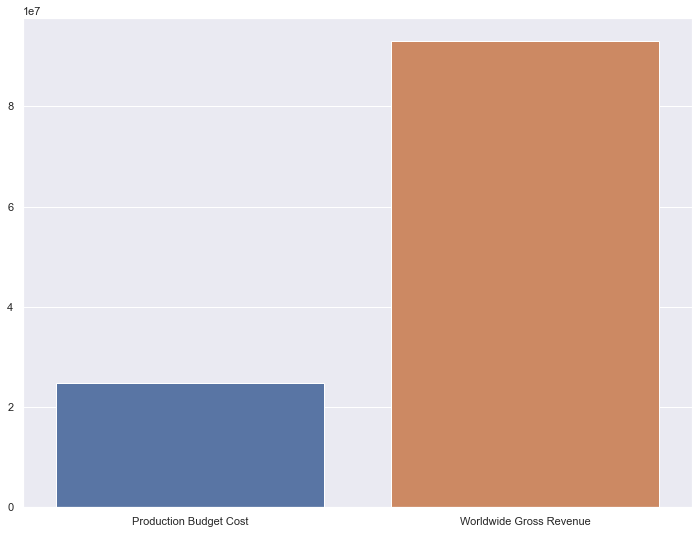

In [14]:
a = ['Production Budget Cost', 'Worldwide Gross Revenue']
b = [budget_avg, revenue_avg]
cost_rev = sns.barplot(x=a, y=b)
sns.set(rc={'figure.figsize':(12,9)});

In [9]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [10]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***